In [2]:
#Imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Locate Data to be used and Merge
pet_csv = "../Resources/adoption_data.csv"
state_csv = "../Resources/2020_population_data.csv"
adoption_data_df = pd.read_csv(pet_csv)
state_data_df = pd.read_csv(state_csv)

pet_data_df = pd.merge(adoption_data_df, state_data_df, on=["State"])

In [6]:
def region_from_state(state):
    if state in ["ME", "NH", "VT", "CT", "RI", "MA"]:
        region = "New England"
    elif state in ["MD", "PA", "NY", "NJ", "DE", "DC"]:
        region = "Mideast"
    elif state in ["WI", "IL", "MI", "IN", "OH"]:
        region = "Great Lakes"
    elif state in ["ND", "SD", "NE", "KS", "MN", "IA", "MO"]:
        region = "Plains" 
    elif state in ["AR", "LA", "MS", "TN", "KY", "WV", "VA", "NC", "SC", "GA", "FL", "AL"]:
        region = "Southeast"   
    elif state in ["AZ", "NM", "TX", "OK"]:
        region = "Southwest "    
    elif state in ["ID", "UT", "MT", "WY", "CO"]:
        region = "Rocky Mountain "
    elif state in ["CA", "NV", "OR", "WA"]:
        region = "Far West"
    elif state in ["HI", "AK", "PR"]:
        region = "Non-Continental"
    else:
        region = "NOT FOUND"
    return region

pet_data_df["Region"] = pet_data_df["State"].map(region_from_state)
pet_data_df.head(10)


,State,Year,Intake - Relinquished By Owner Total-Feline,Intake - Stray At Large Total-Feline,Intake - Transferred In Total-Feline,Intake - Owner Intended Euthanasia Total-Feline,Intakes - Other Intakes Total-Feline,Live Outcome - Adoption Total-Feline,Live Outcome - Returned To Owner Total-Feline,Live Outcome - Returned To Field Total-Feline,...,Live Outcome - Returned To Owner Total-Canine,Live Outcome - Returned To Field Total-Canine,Live Outcome - Transferred Out Total-Canine,Live outcome - Other Live Outcome Total-Canine,Other Outcome - Died In Care Total-Canine,Other Outcome - Lost In Care Total-Canine,Other Outcome - Owner Intended Euthanasia Total-Canine,Other Outcome - Shelter Euthanasia Total-Canine,Population,Region
0,AK,2019.0,850.0,1786.0,32.0,67.0,68.0,1689.0,353.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,733391,Non-Continental
1,AK,2020.0,800.0,1404.0,61.0,51.0,68.0,1755.0,331.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,733391,Non-Continental
2,AK,2021.0,743.0,1522.0,85.0,37.0,70.0,1886.0,289.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,733391,Non-Continental
3,AL,2019.0,5006.0,7199.0,811.0,16.0,467.0,7582.0,140.0,744.0,...,2895.0,15.0,5927.0,1.0,310.0,27.0,111.0,3094.0,5024279,Southeast
4,AL,2020.0,3495.0,6803.0,527.0,19.0,525.0,6816.0,140.0,747.0,...,2303.0,16.0,6483.0,5.0,253.0,21.0,63.0,2054.0,5024279,Southeast
5,AL,2021.0,3282.0,7481.0,683.0,7.0,995.0,7181.0,147.0,1180.0,...,2584.0,0.0,6118.0,90.0,260.0,13.0,37.0,2099.0,5024279,Southeast
6,AR,2019.0,1131.0,3618.0,158.0,3.0,259.0,3630.0,557.0,48.0,...,3367.0,0.0,1765.0,472.0,62.0,1.0,4.0,464.0,3011524,Southeast
7,AR,2020.0,953.0,2307.0,435.0,3.0,176.0,3140.0,166.0,73.0,...,1477.0,0.0,1577.0,305.0,80.0,3.0,5.0,264.0,3011524,Southeast
8,AR,2021.0,1129.0,2406.0,333.0,49.0,256.0,3274.0,125.0,163.0,...,1482.0,4.0,1564.0,266.0,75.0,1.0,34.0,294.0,3011524,Southeast
9,AZ,2019.0,11933.0,14168.0,1367.0,555.0,2042.0,20098.0,508.0,443.0,...,11501.0,578.0,8344.0,391.0,590.0,78.0,1677.0,3044.0,7151502,Southwest


In [7]:
pet_data_df["total_feline_intake"] = pet_data_df['Intake - Stray At Large Total-Feline'] + pet_data_df['Intake - Transferred In Total-Feline'] + pet_data_df['Intake - Owner Intended Euthanasia Total-Feline'] + pet_data_df['Intakes - Other Intakes Total-Feline']
pet_data_df["total_feline_live_outcome"] = pet_data_df['Live Outcome - Adoption Total-Feline'] + pet_data_df['Live Outcome - Returned To Owner Total-Feline'] + pet_data_df['Live Outcome - Returned To Field Total-Feline'] + pet_data_df['Live Outcome - Transferred Out Total-Feline'] + pet_data_df['Live outcome - Other Live Outcome Total-Feline']
pet_data_df["total_feline_other_outcome"] = pet_data_df['Other Outcome - Died In Care Total-Feline'] + pet_data_df['Other Outcome - Lost In Care Total-Feline'] + pet_data_df['Other Outcome - Owner Intended Euthanasia Total-Feline'] + pet_data_df['Other Outcome - Shelter Euthanasia Total-Feline']
pet_data_df["total_canine_intake"] = pet_data_df['Intake - Stray At Large Total-Canine'] + pet_data_df['Intake - Transferred In Total-Canine'] + pet_data_df['Intake - Owner Intended Euthanasia Total-Canine'] + pet_data_df['Intakes - Other Intakes Total-Canine']
pet_data_df["total_canine_live_outcome"] = pet_data_df['Live Outcome - Adoption Total-Canine'] + pet_data_df['Live Outcome - Returned To Owner Total-Canine'] + pet_data_df['Live Outcome - Returned To Field Total-Canine'] + pet_data_df['Live Outcome - Transferred Out Total-Canine'] + pet_data_df['Live outcome - Other Live Outcome Total-Canine']
pet_data_df["total_canine_other_outcome"] = pet_data_df['Other Outcome - Died In Care Total-Canine'] + pet_data_df['Other Outcome - Lost In Care Total-Canine'] + pet_data_df['Other Outcome - Owner Intended Euthanasia Total-Canine'] + pet_data_df['Other Outcome - Shelter Euthanasia Total-Canine']

In [8]:
cat_data_regional = pet_data_df[["Year" , "Region", "State"]].copy()

cat_data_regional["Total Feline Intake"] = pet_data_df['Intake - Stray At Large Total-Feline'] + pet_data_df['Intake - Transferred In Total-Feline'] + pet_data_df['Intake - Owner Intended Euthanasia Total-Feline'] + pet_data_df['Intakes - Other Intakes Total-Feline']
cat_data_regional["Total Feline Outcomes"] = pet_data_df["total_feline_live_outcome"] + pet_data_df["total_feline_other_outcome"]

dog_data_regional = pet_data_df[["Year" , "Region", "State"]].copy()

dog_data_regional["Total Canine Outcomes"] = pet_data_df["total_canine_live_outcome"] + pet_data_df["total_canine_other_outcome"]
dog_data_regional["Total Canine Intake"] = pet_data_df['Intake - Stray At Large Total-Canine'] + pet_data_df['Intake - Transferred In Total-Canine'] + pet_data_df['Intake - Owner Intended Euthanasia Total-Canine'] + pet_data_df['Intakes - Other Intakes Total-Canine']


<AxesSubplot:title={'center':'Annual Regional Outcome per Year'}, xlabel='Regions', ylabel='Number of Animals'>

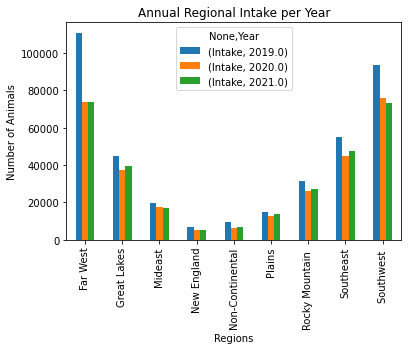

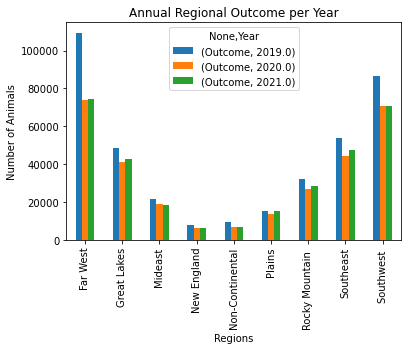

In [9]:
combined_df = pet_data_df[["Year" , "Region"]].copy()

combined_df["Intake"] = cat_data_regional["Total Feline Intake"] + dog_data_regional["Total Canine Outcomes"]

combined_df['Outcome'] = cat_data_regional["Total Feline Outcomes"] + dog_data_regional["Total Canine Intake"]

total_df = combined_df.groupby(["Year","Region"]).sum()

intake_pivot = pd.pivot_table(combined_df, index="Region", columns="Year", values=["Intake"])
intake_pivot.plot(
    kind="bar", 
    xlabel="Regions", 
    ylabel="Number of Animals", 
    title="Annual Regional Intake per Year",)

plt.legend=(["2019","2020","2021"])
plt.show

outcome_pivot = pd.pivot_table(combined_df, index="Region", columns="Year", values=["Outcome"])
outcome_pivot.plot(
    kind="bar", 
    xlabel="Regions", 
    ylabel="Number of Animals", 
    title="Annual Regional Outcome per Year",)

In [10]:
total_df

Intake   Outcome
Year   Region                             
2019.0 Far West         443480.0  437755.0
       Great Lakes      225044.0  242692.0
       Mideast          118738.0  129530.0
       New England       40238.0   47332.0
       Non-Continental   28120.0   27428.0
       Plains           103487.0  107400.0
       Rocky Mountain   156987.0  160726.0
       Southeast        660071.0  645206.0
       Southwest        374131.0  346147.0
2020.0 Far West         294074.0  295307.0
       Great Lakes      186764.0  204406.0
       Mideast          104138.0  113321.0
       New England       31272.0   36340.0
       Non-Continental   19254.0   19508.0
       Plains            89037.0   95789.0
       Rocky Mountain   131836.0  133980.0
       Southeast        539803.0  531794.0
       Southwest        302632.0  282479.0
2021.0 Far West         295024.0  297515.0
       Great Lakes      198305.0  213890.0
       Mideast          103459.0  109260.0
       New England       32637.0   38392.0
       Non-Continental   19968.0   20566.0
       Plains            98495.0  104912.0
       Rocky Mountain   136814.0  141450.0
       Southeast        570941.0  571146.0
       Southwest        293051.0  283186.0